   Vertex/Direction Combination     AUC
0                         $A_r$  0.8119
1                         $A_c$  0.8015
2                         $B_r$  0.8089
3                         $B_c$  0.7694
4                         $C_r$  0.8021
5                         $C_c$  0.7857
6                         $D_r$  0.8187
7                         $D_c$  0.7975
8                      $A_{rc}$  0.8663
9                     $B_{rc}}$  0.8767
10                     $C_{rc}$  0.8673
11                     $D_{rc}$  0.8705
12                   $(ABCD)_r$  0.8952
13                   $(ABCD)_c$  0.9032
14                       $ABCD$  0.9078


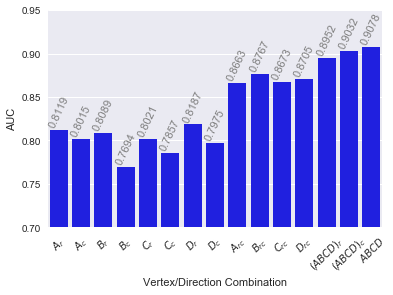

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
data_pd = pd.DataFrame({'Vertex/Direction Combination':['$A_r$','$A_c$','$B_r$','$B_c$','$C_r$','$C_c$','$D_r$','$D_c$',
                                                        '$A_{rc}$','$B_{rc}}$','$C_{rc}$','$D_{rc}$',
                                                        '$(ABCD)_r$','$(ABCD)_c$','$ABCD$'],
                        'AUC':[0.8119,0.8015,0.8089,0.7694,0.8021,0.7857,0.8187,0.7975,0.8663,0.8767,0.8673,0.8705,
                              0.8952,0.9032,0.9078]})       
print(data_pd)

sb = sns.barplot(x="Vertex/Direction Combination", y="AUC", data=data_pd,palette="Greens_d"
            order=['$A_r$','$A_c$','$B_r$','$B_c$','$C_r$','$C_c$','$D_r$','$D_c$',
                   '$A_{rc}$','$B_{rc}}$','$C_{rc}$','$D_{rc}$',
                   '$(ABCD)_r$','$(ABCD)_c$','$ABCD$'])
sb.set_xticklabels(sb.get_xticklabels(),rotation=45)

ax=sb

for p in ax.patches:
     ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', xytext=(0, 18), rotation = 65,
         textcoords='offset points')
_ = sb.set_ylim(0.7,0.95) #To make space for the annotations

C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 65)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 0.008s...
[t-SNE] Computed neighbors for 2572 samples in 0.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 2.170337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.694145
[t-SNE] Error after 1000 iterations: 1.211270
(2572, 2)
t-SNE done! Time elapsed: 58.46305465698242 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


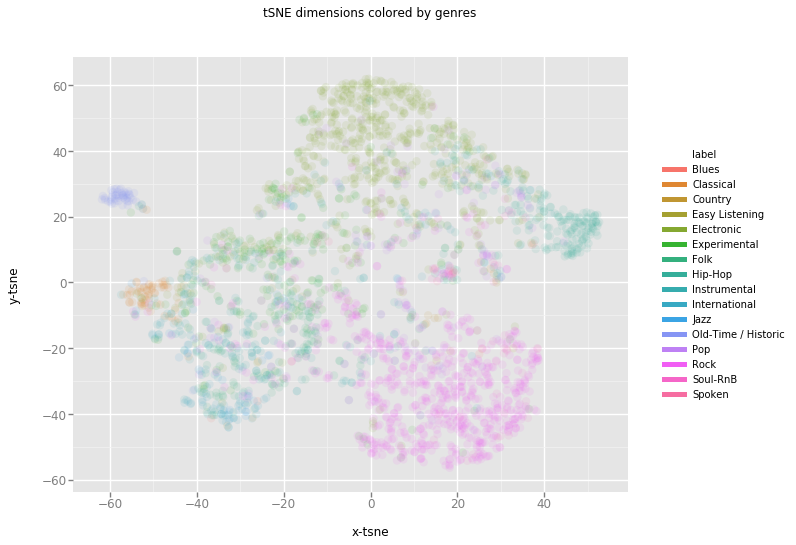

<ggplot: (43511665)>


In [1]:
# t-SNE of cGrnn

%matplotlib inline
import numpy as np

X = np.load('test_feats_cGrnn_13.npy')

import sys
sys.path.append('C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master')
import utils
PATH_CSV = 'C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1) + ggtitle("tSNE dimensions colored by genres")
print(p)

C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 65)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 0.008s...
[t-SNE] Computed neighbors for 2572 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 2.727727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.371841
[t-SNE] Error after 1000 iterations: 1.280250
(2572, 2)
t-SNE done! Time elapsed: 65.26352572441101 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


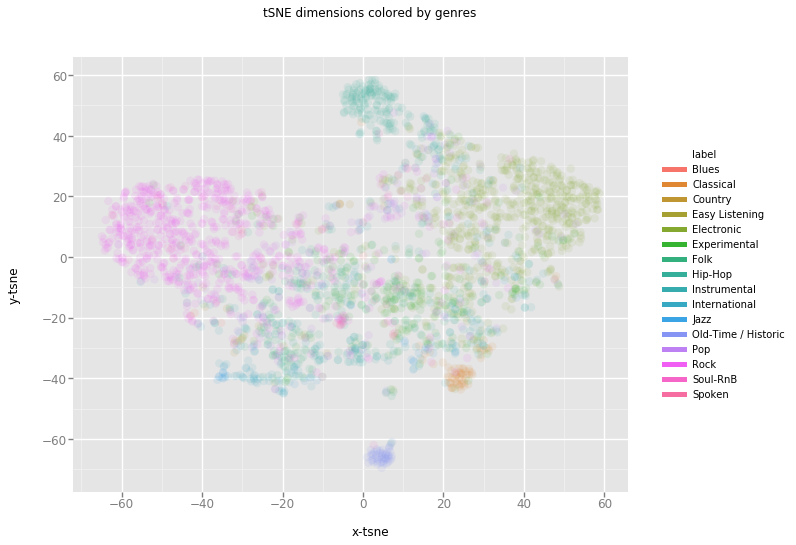

<ggplot: (43498872)>


In [1]:
# t-SNE of cGrnn

%matplotlib inline
import numpy as np

X = np.load('test_feats_cGrnn_29.npy')

import sys
sys.path.append('C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master')
import utils
PATH_CSV = 'C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1) + ggtitle("tSNE dimensions colored by genres")
print(p)

C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 33)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 0.000s...
[t-SNE] Computed neighbors for 2572 samples in 0.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 0.493255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.287804
[t-SNE] Error after 1000 iterations: 1.113972
(2572, 2)
t-SNE done! Time elapsed: 68.15013933181763 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


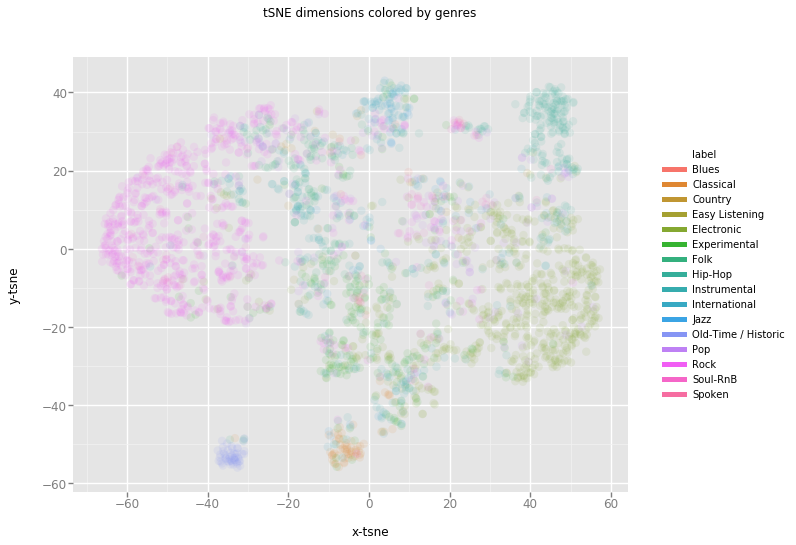

<ggplot: (-9223372036811259388)>


In [1]:
# t-SNE of crnn

%matplotlib inline
import numpy as np

X = np.load('test_feats_crnn_13.npy')

import sys
sys.path.append('C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master')
import utils
PATH_CSV = 'C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1) + ggtitle("tSNE dimensions colored by genres")
print(p)

C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 33)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 0.000s...
[t-SNE] Computed neighbors for 2572 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 0.549055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.111877
[t-SNE] Error after 1000 iterations: 1.165363
(2572, 2)
t-SNE done! Time elapsed: 62.90021848678589 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


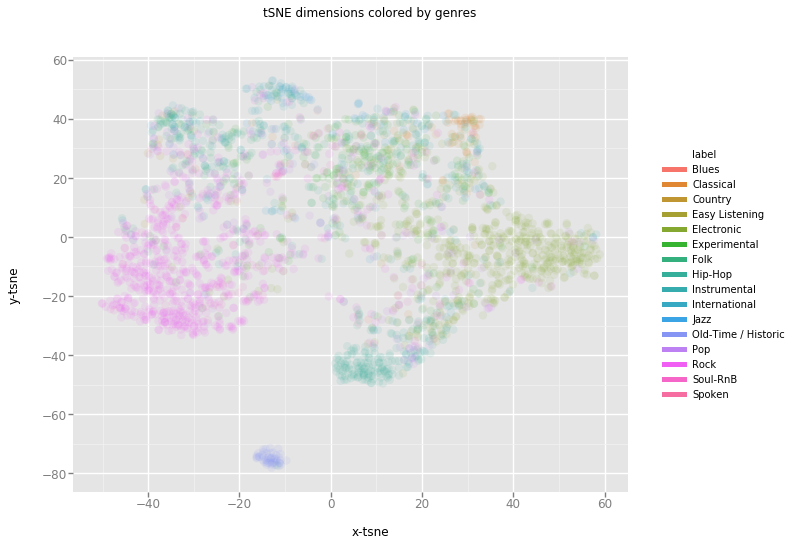

<ggplot: (-9223372036811246837)>


In [1]:
# t-SNE of crnn

%matplotlib inline
import numpy as np

X = np.load('test_feats_crnn_30.npy')

import sys
sys.path.append('C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master')
import utils
PATH_CSV = 'C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1) + ggtitle("tSNE dimensions colored by genres")
print(p)

C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master\utils.py:212: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


(2573,)
len(list test_y): 2572
len(array y): 2572
['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
Size of the dataframe: (2572, 33)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2572 samples in 0.005s...
[t-SNE] Computed neighbors for 2572 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2572
[t-SNE] Computed conditional probabilities for sample 2000 / 2572
[t-SNE] Computed conditional probabilities for sample 2572 / 2572
[t-SNE] Mean sigma: 0.549055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.069794
[t-SNE] Error after 1000 iterations: 1.159866
(2572, 2)
t-SNE done! Time elapsed: 67.0530002117157 seconds


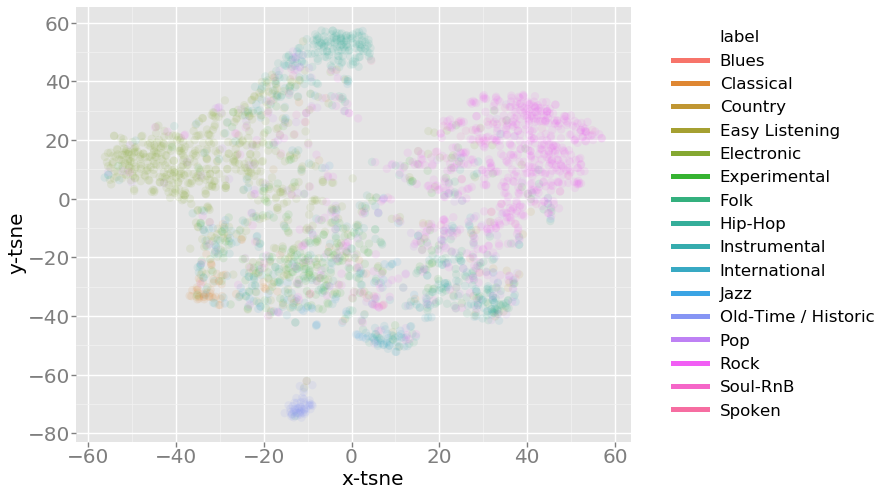

<ggplot: (35021281)>


In [3]:
# t-SNE of crnn

%matplotlib inline
import numpy as np

X = np.load('test_feats_crnn_30.npy')

import sys
sys.path.append('C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma-master')
import utils
PATH_CSV = 'C:/Users/Administrator/Desktop/Papers/deep learning for recommender/fma_metadata'
tracks = utils.load(PATH_CSV+'/tracks.csv')

medium = tracks['set', 'subset'] <= 'medium'
test = tracks['set', 'split'] == 'test'
test = tracks.loc[medium & test, ('track', 'genre_top')]
print(test.shape)

count = 0
count_error = 0
list_test = []
test_y = []

for j,i in enumerate(test.index):
    if j == 104:
        continue
    else:
        test_y.append(test[i])
print('len(list test_y):',len(test_y))
y = np.array(test_y)
print('len(array y):',len(y))
print(y)

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,learning_rate = 200.0)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)
print(tsne_results.shape)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

from ggplot import *

df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

p = ggplot( df, aes(x='x-tsne', y='y-tsne', color='label')) + geom_point(size=70,alpha=0.1)
t = theme_gray()
t._rcParams['font.size'] = 20 # Legend font size

print(p)

In [11]:
# evaluation metrics on FMA (cnn)

import pickle

cnn_aucs = pickle.load(open('cnn_aucs.pkl','rb'))
print(cnn_aucs)

max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('max:',max_auc,idx)

import pickle

cnn_recalls = pickle.load(open('cnn_recalls.pkl','rb'))
# print(cnn_recalls)

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    print(cnn_recalls[i][8])
    if max_recall < cnn_recalls[i][8]:
        max_recall = cnn_recalls[i][8]
        idx = i + 1
print('max:',max_recall,idx)

import pickle

cnn_precisions = pickle.load(open('cnn_precisions.pkl','rb'))
# print(cnn_precisions)

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    print(cnn_precisions[i][8])
    if max_precision < cnn_precisions[i][8]:
        max_precision = cnn_precisions[i][8]
        idx = i + 1
print('max:',max_precision,idx)

import pickle

cnn_f1s = pickle.load(open('cnn_f1s.pkl','rb'))
# print(cnn_f1s)

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    print(cnn_f1s[i][8])
    if max_f1 < cnn_f1s[i][8]:
        max_f1 = cnn_f1s[i][8]
        idx = i + 1
print('max:',max_f1,idx)

import pickle

cnn_accs = pickle.load(open('cnn_accs.pkl','rb'))
# print(cnn_accs)

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    print(cnn_accs[i])
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('max:',max_acc,idx)

0.3386469672942421
0.5279937791833611
0.5233281493001555
0.5486003110419907
0.567651632970451
0.5808709175970469
0.5909797822821937
0.5824261275388034
0.5886469673521783
0.6096423017339054
0.5847589424572317
0.5723172628420693
0.5855365474339036
0.6030326594090202
0.609642301710731
0.59992223951392
0.5727060653304052
0.5563763607623603
0.6073094867807154
0.6073094867807154
0.5929237947238734
0.5820373250388803
0.5940902021772939
0.6065318818040435
0.5703732503424537
0.59992223951392
0.5859253499222395
0.6034214619089434
0.5960342146305608
0.6045878693739511
0.6096423017339054 10


In [1]:
# evaluation metrics on FMA (crnn)

import pickle

cnn_aucs = pickle.load(open('crnn_aucs.pkl','rb'))

max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('auc max:',max_auc,idx)

cnn_recalls = pickle.load(open('crnn_recalls.pkl','rb'))

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    if max_recall < cnn_recalls[i][8]:
        max_recall = cnn_recalls[i][8]
        idx = i + 1
print('recall max:',max_recall,idx)

cnn_precisions = pickle.load(open('crnn_precisions.pkl','rb'))

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    if max_precision < cnn_precisions[i][8]:
        max_precision = cnn_precisions[i][8]
        idx = i + 1
print('precision max:',max_precision,idx)

cnn_f1s = pickle.load(open('crnn_f1s.pkl','rb'))

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    if max_f1 < cnn_f1s[i][8]:
        max_f1 = cnn_f1s[i][8]
        idx = i + 1
print('f1 max:',max_f1,idx)

cnn_accs = pickle.load(open('crnn_accs.pkl','rb'))

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('acc max:',max_acc,idx)

auc max: 0.9091774425199451 13
recall max: 0.6987474454027751 28
precision max: 0.8030977588443805 30
f1 max: 0.7211201940675945 29
acc max: 0.6294712286158631 13


In [1]:
# evaluation metrics on FMA (cGrnn)

import pickle

cnn_aucs = pickle.load(open('cGrnn_aucs.pkl','rb'))
max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('auc max:',max_auc,idx)

cnn_recalls = pickle.load(open('cGrnn_recalls.pkl','rb'))

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    if max_recall < cnn_recalls[i][8]:
        max_recall = cnn_recalls[i][8]
        idx = i + 1
print('recall max:',max_recall,idx)

cnn_precisions = pickle.load(open('cGrnn_precisions.pkl','rb'))

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    if max_precision < cnn_precisions[i][8]:
        max_precision = cnn_precisions[i][8]
        idx = i + 1
print('precision max:',max_precision,idx)

cnn_f1s = pickle.load(open('cGrnn_f1s.pkl','rb'))

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    if max_f1 < cnn_f1s[i][8]:
        max_f1 = cnn_f1s[i][8]
        idx = i + 1
print('f1 max:',max_f1,idx)

cnn_accs = pickle.load(open('cGrnn_accs.pkl','rb'))

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('acc max:',max_acc,idx)

auc max: 0.909568393463057 13
recall max: 0.6319932681460492 28
precision max: 0.8320540728896321 29
f1 max: 0.6603056895786953 28
acc max: 0.6508553654743391 29


In [4]:
#Weighted metrics

# evaluation metrics on FMA (cnn)

import pickle

cnn_aucs = pickle.load(open('cnn_aucs.pkl','rb'))

max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('max:',max_auc,idx)


cnn_recalls = pickle.load(open('cnn_recalls.pkl','rb'))

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    if max_recall < cnn_recalls[i][7]:
        max_recall = cnn_recalls[i][7]
        idx = i + 1
print('max:',max_recall,idx)


cnn_precisions = pickle.load(open('cnn_precisions.pkl','rb'))

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    if max_precision < cnn_precisions[i][7]:
        max_precision = cnn_precisions[i][7]
        idx = i + 1
print('max:',max_precision,idx)

cnn_f1s = pickle.load(open('cnn_f1s.pkl','rb'))

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    if max_f1 < cnn_f1s[i][7]:
        max_f1 = cnn_f1s[i][7]
        idx = i + 1
print('max:',max_f1,idx)


cnn_accs = pickle.load(open('cnn_accs.pkl','rb'))

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('max:',max_acc,idx)

# evaluation metrics on FMA (crnn)

import pickle

cnn_aucs = pickle.load(open('crnn_aucs.pkl','rb'))

max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('auc max:',max_auc,idx)

cnn_recalls = pickle.load(open('crnn_recalls.pkl','rb'))

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    if max_recall < cnn_recalls[i][7]:
        max_recall = cnn_recalls[i][7]
        idx = i + 1
print('recall max:',max_recall,idx)

cnn_precisions = pickle.load(open('crnn_precisions.pkl','rb'))

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    if max_precision < cnn_precisions[i][7]:
        max_precision = cnn_precisions[i][7]
        idx = i + 1
print('precision max:',max_precision,idx)

cnn_f1s = pickle.load(open('crnn_f1s.pkl','rb'))

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    if max_f1 < cnn_f1s[i][7]:
        max_f1 = cnn_f1s[i][7]
        idx = i + 1
print('f1 max:',max_f1,idx)

cnn_accs = pickle.load(open('crnn_accs.pkl','rb'))

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('acc max:',max_acc,idx)

# evaluation metrics on FMA (cGrnn)

import pickle

cnn_aucs = pickle.load(open('cGrnn_aucs.pkl','rb'))
max_auc = 0
idx = -1
for i in range(len(cnn_aucs)):
    if max_auc < cnn_aucs[i][2]:
        max_auc = cnn_aucs[i][2]
        idx = i + 1
print('auc max:',max_auc,idx)

cnn_recalls = pickle.load(open('cGrnn_recalls.pkl','rb'))

max_recall = 0
idx = -1
for i in range(len(cnn_recalls)):
    if max_recall < cnn_recalls[i][7]:
        max_recall = cnn_recalls[i][7]
        idx = i + 1
print('recall max:',max_recall,idx)

cnn_precisions = pickle.load(open('cGrnn_precisions.pkl','rb'))

max_precision = 0
idx = -1
for i in range(len(cnn_precisions)):
    if max_precision < cnn_precisions[i][7]:
        max_precision = cnn_precisions[i][7]
        idx = i + 1
print('precision max:',max_precision,idx)

cnn_f1s = pickle.load(open('cGrnn_f1s.pkl','rb'))

max_f1 = 0
idx = -1
for i in range(len(cnn_f1s)):
    if max_f1 < cnn_f1s[i][7]:
        max_f1 = cnn_f1s[i][7]
        idx = i + 1
print('f1 max:',max_f1,idx)

cnn_accs = pickle.load(open('cGrnn_accs.pkl','rb'))

max_acc = 0
idx = -1
for i in range(len(cnn_accs)):
    if max_acc < cnn_accs[i]:
        max_acc = cnn_accs[i]
        idx = i + 1
print('acc max:',max_acc,idx)

max: 0.8914951176831908 15
max: 0.609642301710731 10
max: 0.6020733634752558 10
max: 0.5890060835457094 24
max: 0.6096423017339054 10
auc max: 0.9091774425199451 13
recall max: 0.6294712286158631 13
precision max: 0.6306357951997342 14
f1 max: 0.5980227745593454 30
acc max: 0.6294712286158631 13
auc max: 0.909568393463057 13
recall max: 0.6508553654743391 29
precision max: 0.6498071066171796 29
f1 max: 0.6381611782483108 29
acc max: 0.6508553654743391 29


In [2]:
aucs_1 = [0.8307993629916494, 0.8401288566917342, 0.8482556420761653, 0.877270862933797, 0.8554820296962191, 0.8845237508971364, 0.887741589230084, 0.8693868011019323, 0.8832392808248577, 0.8826700379415934, 0.8767970877321417, 0.887211177003661, 0.8756735945312589, 0.8614584275016512, 0.8905276907862115, 0.8884059904785452, 0.8903306055305914, 0.8774882548405116, 0.884973927100297, 0.8782111364760288, 0.881736394842574, 0.8847010692034174, 0.8853482549601379, 0.8870652436415887, 0.8811637814973917, 0.8812900892779691, 0.876764267052089, 0.8771818195622373, 0.881529939263442, 0.8844981239310695]
recalls_1 = [0.20542990159162244, 0.21761739626686516, 0.23504120622733154, 0.27071354670448133, 0.255430577958728, 0.30748676664687496, 0.2821869482768343, 0.3107993804574107, 0.3257491785349762, 0.31483483770139414, 0.3387790950568685, 0.2830519006113138, 0.32880382568812017, 0.21088928568464188, 0.3348943958787544, 0.30674020183286677, 0.3619807847400187, 0.2914511626685602, 0.32220162216928777, 0.3095545463415667, 0.3441358839818386, 0.3208770110619164, 0.31038312713250016, 0.31769849189525445, 0.3137825503954529, 0.38398079375893646, 0.2725088830106056, 0.283998490387234, 0.3492477533362309, 0.31361446524369907]
precisions_1 = [0.19013837887362156, 0.250969245059196, 0.21584822337543855, 0.3050128086553834, 0.23533040645732556, 0.3084423644191428, 0.28766207812133043, 0.2874205864082327, 0.3077017149679939, 0.274437555661339, 0.3344466645764008, 0.3129607332269465, 0.32585678671154505, 0.3332998724146482, 0.351804960286438, 0.3377469886810069, 0.35232501461132626, 0.3326246958710902, 0.3124368476528182, 0.2904365318844996, 0.3510929970035315, 0.34469294182922716, 0.3622349531589154, 0.33017030994884367, 0.3368430271567012, 0.3421072406241601, 0.33843659388225733, 0.3374951804827617, 0.3404796473864149, 0.3358490124731677]
f1s_1 = [0.18507195739607557, 0.21216227203105606, 0.19885691425125868, 0.2673053831326845, 0.21332210876296454, 0.2771764810821659, 0.26954670528980984, 0.24468280916962787, 0.3072629891738336, 0.27486970483562423, 0.3029171487291993, 0.28360862549069277, 0.2999591594242012, 0.22803107619916455, 0.32700636872859734, 0.3109415298018334, 0.34450392163465793, 0.2979394826777738, 0.30419513991886693, 0.29102351142156524, 0.33552050547366774, 0.31657137950065706, 0.31433041445725274, 0.3137777099960739, 0.31393356998953803, 0.3359724655601281, 0.2802331757485529, 0.2934199862919988, 0.33697529022995454, 0.31472167730883777]
accs_1 = [0.5027216174183515, 0.484447900466563, 0.42729393477387967, 0.5793157076205288, 0.46500777604976673, 0.5890357698289269, 0.5902021772939346, 0.4860031104199067, 0.5929237947122862, 0.5431570762284621, 0.5579315707620529, 0.5902021772939346, 0.5804821150855366, 0.44867807153965783, 0.6139191290824261, 0.5983670295721636, 0.6139191290360773, 0.578538102643857, 0.6049766718622871, 0.5730948678187412, 0.6092534992339822, 0.6076982892690513, 0.6010886469673405, 0.6111975116872491, 0.5851477449455676, 0.589035769782578, 0.5738724727838258, 0.5828149300155521, 0.6084758942573104, 0.5987558320489123]

aucs_2 = [0.8473261457280441, 0.8917927977566298, 0.9000530533402396, 0.8841462985364452, 0.9079171861523386, 0.9095191603698951, 0.862863213308199, 0.8887920160562593, 0.9058674729376125, 0.9108339289490761, 0.9039782240556707, 0.9057685780890702, 0.8995177329587186, 0.9127274604123244, 0.9078485736559181, 0.8888697587905917, 0.885139780249736, 0.8861379932985347, 0.894118665954735, 0.8663674594505115, 0.8949679380904566, 0.8673867577387505, 0.8974057396627252, 0.9033670041909315, 0.8850801172230843, 0.8918597766546289, 0.8911950535023692, 0.8817736429975127, 0.8732897582525427, 0.8609804044196661]
recalls_2 = [0.1951780408539108, 0.32421261248020883, 0.31673303292841315, 0.23939543491739804, 0.39001036511123544, 0.26540585280829576, 0.18274285275118538, 0.3758648254012549, 0.2868306145359262, 0.35527052913834944, 0.41429604771907613, 0.3509874949633359, 0.30422760518214187, 0.3650328548713172, 0.3802816688267587, 0.38793635232486345, 0.3109107117842643, 0.29690193389564956, 0.39336147875958216, 0.29372652553639966, 0.41438525046530245, 0.3585064940006556, 0.36067082479170776, 0.4065670855974688, 0.37329577385856844, 0.3774748195091535, 0.2954708353203598, 0.3599282353878814, 0.3663076715680289, 0.3373721372183516]
precisions_2 = [0.26637762459424896, 0.28791188816417224, 0.31502906119516066, 0.30639069651910766, 0.3720051685684502, 0.32413445142980274, 0.2755959755581271, 0.31438406086359844, 0.34811508188058693, 0.39264487296529316, 0.3792385661922588, 0.34877816018150865, 0.4003797599019266, 0.42434697278664296, 0.4246591895106698, 0.32398058532970164, 0.3845453796243483, 0.40716212925871864, 0.3923915222433003, 0.3387155657388213, 0.3579286286622469, 0.3738684847271676, 0.4079096210768558, 0.41442830409616616, 0.396776605953435, 0.3759435922757975, 0.39858470403252566, 0.4211540533114579, 0.4032615306223682, 0.3749532348665261]
f1s_2 = [0.1869464128568934, 0.29006567452350335, 0.30166450106646797, 0.22762028343832091, 0.36304919350615916, 0.2589781708235085, 0.178286977652109, 0.3198514403221083, 0.2882714100648231, 0.35242064321065336, 0.3515224218214057, 0.3317418319864771, 0.3183400093414662, 0.365367023944395, 0.3729191964266138, 0.330560187823561, 0.31379899401545575, 0.2968870530026792, 0.3762725112959133, 0.28248808298991623, 0.36355989752681606, 0.33235833336464127, 0.3406662869252317, 0.4016817365010832, 0.3683545220206998, 0.3517924548756801, 0.30516692160335057, 0.37349052211980005, 0.3617816266968257, 0.33325755346893254]
accs_2 = [0.42612752730887193, 0.580482115108711, 0.6014774495020254, 0.5046656297673333, 0.6251944012905168, 0.6038102643856921, 0.43506998444790046, 0.5859253499222395, 0.6135303265940902, 0.6275272161857708, 0.584370139876198, 0.5723172628536566, 0.5890357698289269, 0.6333592534992224, 0.6294712286274503, 0.5867029549916091, 0.5555987558783861, 0.5944790046888043, 0.6014774494672638, 0.5400466562986003, 0.596423017130484, 0.5276049767645484, 0.6271384136974348, 0.6341368584874815, 0.568818040447046, 0.6003110419906688, 0.5843701399688958, 0.5890357698289269, 0.5489891135419138, 0.5373250389034233]

aucs_3 = [0.8634143201158748, 0.8671777571256768, 0.8744619410795119, 0.8303806135717038, 0.8886443617205858, 0.8565369902397031, 0.8998914916589302, 0.8975185860591108, 0.8650134525300357, 0.8801070048520373, 0.8874940055591398, 0.8962771651209043, 0.8794832847200762, 0.898890843981371, 0.8996249067219128, 0.897772902517761, 0.9049267944171095, 0.9022236909235611, 0.9103322859325941, 0.892442736283739, 0.9000933441261953, 0.9022137904071995, 0.8989382053144116, 0.9059792024627877, 0.9081454153560536, 0.9060494274511963, 0.9029496780640747, 0.8928565772686042, 0.894598782282738, 0.9004962719151657, 0.9004283527010882, 0.895992339551818, 0.9000143278244519, 0.8844644631642292, 0.8903315304562621, 0.9016137691565048, 0.8867390296023336, 0.8933625268073879, 0.8927435214815684, 0.8886208775071672]
recalls_3 = [0.26029438640233865, 0.2409718493712973, 0.3076977211049675, 0.23179413481429834, 0.2487123883848354, 0.18805607802660593, 0.2966091546358969, 0.342596471535787, 0.27942091910180855, 0.24031296678126834, 0.32258172568271526, 0.3341861480516687, 0.29318901508381456, 0.34563467032282036, 0.29966193795949525, 0.33355349386192146, 0.3485056227362613, 0.36526609244991964, 0.3636146276617805, 0.3888252249110812, 0.4115938162714405, 0.38759453157219503, 0.40176242543062396, 0.3526525103099486, 0.3758563807651266, 0.42462540084206857, 0.3382949860150661, 0.3873911312447297, 0.36181736310442153, 0.4239295171232954, 0.3799217480238277, 0.4130659313315145, 0.37685671871993487, 0.3340474504977695, 0.40307514359898206, 0.39021275197641164, 0.4153488919671787, 0.35089592186281404, 0.3746683007927466, 0.40091673717140097]
precisions_3 = [0.2862196085137891, 0.3102689790952379, 0.3232712077845534, 0.23006545067128986, 0.31370578628951656, 0.27950614553875425, 0.42424968556608933, 0.371327108603584, 0.31910348421004175, 0.30675028584570885, 0.3413517171717705, 0.3731453875645202, 0.3207556937540772, 0.4346806776081438, 0.39338726710545224, 0.3944716620423193, 0.36853271615478145, 0.3666151113602599, 0.4215430989342472, 0.36633516976868186, 0.40632663866096186, 0.40605782305552207, 0.36434201670343214, 0.44954941405773524, 0.42162036896641153, 0.42610905731323645, 0.4065944400888629, 0.3753799670903807, 0.4117567296854412, 0.4190428826641952, 0.40407716373161606, 0.4021951792730924, 0.42881415978509374, 0.4160210979790009, 0.4062498194131103, 0.4423143378708159, 0.40538994807815254, 0.4303247957208045, 0.43287230259785703, 0.38665199054706023]
f1s_3 = [0.256842260770342, 0.22650723968884817, 0.2753186055478013, 0.19201031153905815, 0.25030889069162543, 0.18270130809492516, 0.3024445843079523, 0.32657396423378904, 0.27191306810196925, 0.24719848248757564, 0.28178876796175034, 0.3162338393312646, 0.24228925823389247, 0.3477673689606056, 0.31456646969158303, 0.3312674473643654, 0.3297005817226696, 0.355059156025898, 0.3683419260038836, 0.3464198000387093, 0.38800475427558473, 0.37322456706165086, 0.3736394696177454, 0.3610898688398294, 0.3846526796817641, 0.40553363258447006, 0.346734912436635, 0.3635160870840115, 0.36230195790655834, 0.40739229479439304, 0.3734162572507393, 0.3903040962651974, 0.3800060023254073, 0.3443293311554188, 0.3870967488858045, 0.3908822898511092, 0.385704353108842, 0.35575601659174255, 0.379380941930144, 0.3836833674793692]
accs_3 = [0.5579315707620529, 0.4751166407465008, 0.5260497667648558, 0.3856920684524124, 0.5649300155520995, 0.46228615863141526, 0.6065318818040435, 0.6076982892690513, 0.5338258164852255, 0.5128304821150855, 0.5579315707736401, 0.5839813374805599, 0.5066096423017107, 0.6053654743506229, 0.5695956454121306, 0.6022550544439356, 0.6084758942457231, 0.5734836702027921, 0.6349144634062173, 0.5482115086463525, 0.6391912908706101, 0.6267496112090989, 0.6143079316634598, 0.6286936235928424, 0.6248055987674193, 0.6411353032659409, 0.6283048211972042, 0.5913685847589425, 0.6053654743506229, 0.6473561431256646, 0.6337480559875583, 0.6131415241057543, 0.6248055987558321, 0.599922239455984, 0.5995334370139969, 0.6391912907315636, 0.6189735614307932, 0.6248055987558321, 0.6251944012441679, 0.6041990668276791]

print("CNN:",max(aucs_1),max(recalls_1),max(precisions_1),max(f1s_1),max(accs_1))
print("CrNN:",max(aucs_2),max(recalls_2),max(precisions_2),max(f1s_2),max(accs_2))
print("CGrNN:",max(aucs_3),max(recalls_3),max(precisions_3),max(f1s_3),max(accs_3))

CNN: 0.8905276907862115 0.38398079375893646 0.3622349531589154 0.34450392163465793 0.6139191290824261
CrNN: 0.9127274604123244 0.41438525046530245 0.4246591895106698 0.4016817365010832 0.6341368584874815
CGrNN: 0.9103322859325941 0.42462540084206857 0.44954941405773524 0.40739229479439304 0.6473561431256646
